<a href="https://colab.research.google.com/github/joekibz/moringa-wk4/blob/main/Wk4_Friday_18thNov_Project_Feature_engineering_%5BJoseph_Thiongo%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding


<b>Background</b><br>
Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. <br>Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. <br>The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move

<br>
<br>
<i>Image source [https://www.techinafrica.com/digital-delivery-platform-sendy-raises-2m/] </i>

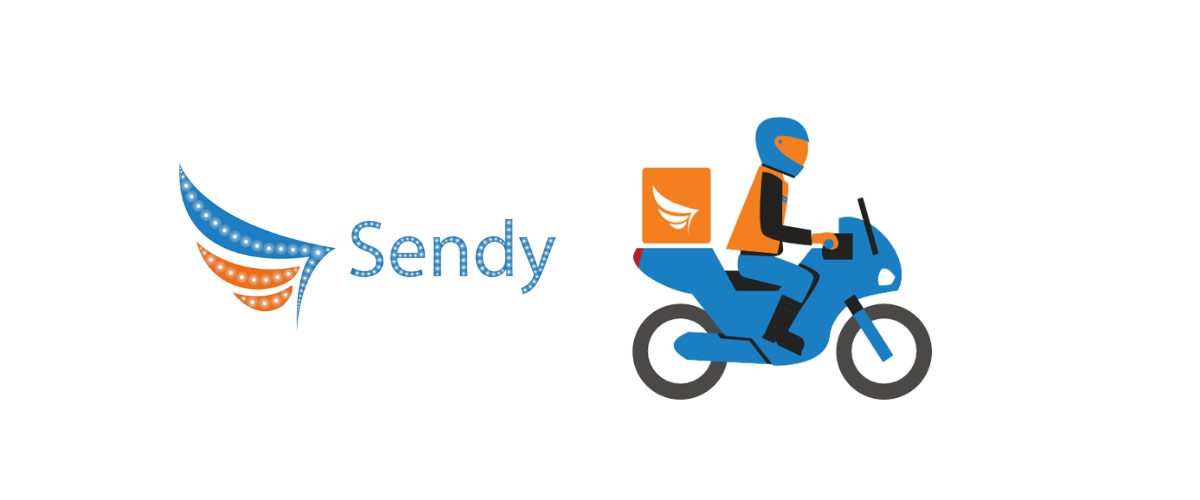

<b>Problem Statement</b><br>
Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination. <br> An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis.

#Success Criteria 

Create your base model (ensemble regressor), then later improve the accuracy of the
base model by performing the learned feature engineering techniques

#Methodology

● Data Importation <br>
● Data Exploration & Analysis [univariate, bivariate] <br>
● Data Cleaning <br>
● Data Preparation <br>
● Data Modeling <br>
● Model Evaluation, Hyparameter Tuning <br>
● Challenging the solution <br>
● Findings and Recommendations <br>

#1- Data Importation

In [94]:
#Import the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import datetime as dt
from datetime import datetime

In [95]:
###Imports for step forward feature selection
# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
#Import the data
data = pd.read_csv("https://bit.ly/3deaKEM") 

#explore the data shape
print(f"There are {len(data)} rows in the Dataset")
print(f"The Dataset has {data.shape[1]} features")
data.head()

There are 21201 rows in the Dataset
The Dataset has 29 features


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [97]:
#Dataset info
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [98]:
#Dataset random sample
data.sample(8)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
10299,Order_No_6176,User_Id_3517,Bike,3,Business,21,2,2:11:43 PM,21,2,...,3:19:26 PM,16,25.1,NaN,-1.300921,36.828195,-1.388201,36.769945,Rider_Id_137,716
13724,Order_No_18360,User_Id_2671,Bike,1,Personal,20,6,9:48:34 AM,20,6,...,11:27:02 AM,18,25.7,NaN,-1.297544,36.756396,-1.207047,36.785412,Rider_Id_299,2229
8939,Order_No_26245,User_Id_1008,Bike,3,Personal,3,5,11:47:50 AM,3,5,...,12:30:07 PM,5,NaN,NaN,-1.286897,36.823298,-1.303993,36.818049,Rider_Id_831,1721
13702,Order_No_10699,User_Id_816,Bike,3,Business,25,3,9:50:20 AM,25,3,...,10:52:42 AM,7,13.7,NaN,-1.290894,36.822971,-1.255189,36.782203,Rider_Id_338,2602
9376,Order_No_10553,User_Id_893,Bike,3,Business,19,1,10:58:35 AM,19,1,...,11:33:25 AM,5,24.6,NaN,-1.259447,36.808912,-1.285052,36.785959,Rider_Id_547,1056
9703,Order_No_1707,User_Id_1991,Bike,3,Personal,27,7,4:56:18 PM,27,7,...,6:19:36 PM,14,NaN,NaN,-1.321890,36.858973,-1.304758,36.773911,Rider_Id_26,2078
12803,Order_No_12731,User_Id_635,Bike,3,Business,5,6,9:29:43 AM,5,6,...,10:19:09 AM,9,19.0,NaN,-1.259956,36.799344,-1.312124,36.815489,Rider_Id_753,1505
16275,Order_No_11787,User_Id_635,Bike,3,Business,21,4,7:45:27 AM,21,4,...,10:06:15 AM,19,21.9,NaN,-1.308138,36.832977,-1.223961,36.716941,Rider_Id_419,6333


In [99]:
#Statistical Summary of the Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


#2- Data Exploration & Analysis [univariate, bivariate]

In [100]:
#Exploring column unique vars 

for i in data.columns:
  print(F'{i}:',len(data[i].unique()))

Order No: 21201
User Id: 3186
Vehicle Type: 1
Platform Type: 4
Personal or Business: 2
Placement - Day of Month: 31
Placement - Weekday (Mo = 1): 7
Placement - Time: 15686
Confirmation - Day of Month: 31
Confirmation - Weekday (Mo = 1): 7
Confirmation - Time: 15742
Arrival at Pickup - Day of Month: 31
Arrival at Pickup - Weekday (Mo = 1): 7
Arrival at Pickup - Time: 15767
Pickup - Day of Month: 31
Pickup - Weekday (Mo = 1): 7
Pickup - Time: 15690
Arrival at Destination - Day of Month: 31
Arrival at Destination - Weekday (Mo = 1): 7
Arrival at Destination - Time: 15725
Distance (KM): 45
Temperature: 189
Precipitation in millimeters: 55
Pickup Lat: 3666
Pickup Long: 3656
Destination Lat: 5302
Destination Long: 5267
Rider Id: 924
Time from Pickup to Arrival: 4067


In [101]:
#Remove spaces in column names
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_-_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [102]:
#Exploring pick up map

fig = px.scatter_mapbox(
    data,
    lat="Pickup_Lat",
    lon="Pickup_Long",
    color="Placement_-_Day_of_Month",
    mapbox_style="open-street-map",
    title="Distribution of Pickup locations ",
)

fig.show()

In [103]:
#Exploring destinations map

fig = px.scatter_mapbox(
    data,
    lat="Destination_Lat",
    lon="Destination_Long",
    color="Placement_-_Day_of_Month",
    mapbox_style="open-street-map",
    title="Distribution of Drop-off locations ",
)

fig.show()

In [104]:
#"Exploring order categories n platforms"

fig = px.histogram(data, 
      x="Personal_or_Business",
      y="Placement_-_Weekday_(Mo_=_1)",
      color="Platform_Type",
      barmode="group",
      histfunc="count",
      title=f"Exploring order categories n platforms",
      category_orders={"Platform_Type":[1,2,3,4]}
      )
fig.show()

In [105]:
fig = px.box(data, y="Time_from_Pickup_to_Arrival", title="Exploring delivery times [seconds] ....")
fig.show()

In [106]:
#Exploring distance and delivery time features
fig = px.scatter(data, x="Distance_(KM)", y="Time_from_Pickup_to_Arrival", title="Explore distance[kms] vs deliver time[secs]")
fig.show()

In [107]:
#Exploring vars correlation

v1=['Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_-_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival']

view=data[v1]

cor =view.corr()
cor

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival
Platform_Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement_-_Day_of_Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement_-_Weekday_(Mo_=_1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation_-_Day_of_Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation_-_Weekday_(Mo_=_1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival_at_Pickup_-_Day_of_Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Arrival_at_Pickup_-_Weekday_(Mo_=_1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Pickup_-_Day_of_Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Pickup_-_Weekday_(Mo_=_1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival_at_Destination_-_Day_of_Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701


Heatmap points to high correlation between the pickup,confirmation,arrival days which is expected for same day service delivery ...



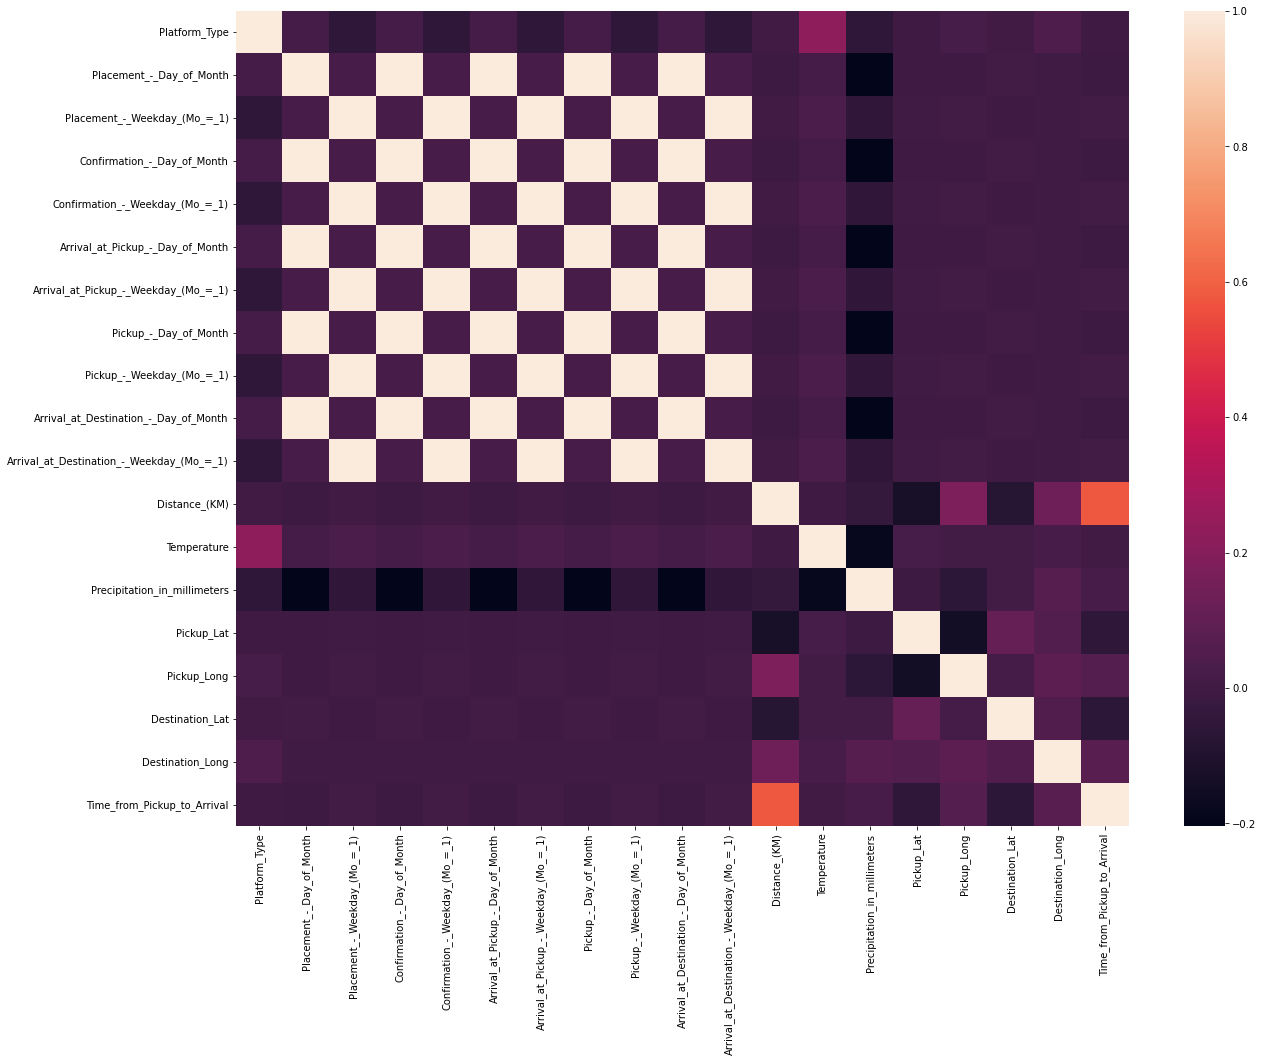

In [108]:
#Exploring corr heatmap
print("Heatmap points to high correlation between the pickup,confirmation,arrival days which is expected for same day service delivery ...\n")
plt.figure(figsize = (20,15))
sns.heatmap(cor);

#3- Data Cleaning 

In [109]:
#Check for nulls

print("Temperature and Precipitation columns have null entries ...\n");
data.isnull().sum()

Temperature and Precipitation columns have null entries ...



Order_No                                         0
User_Id                                          0
Vehicle_Type                                     0
Platform_Type                                    0
Personal_or_Business                             0
Placement_-_Day_of_Month                         0
Placement_-_Weekday_(Mo_=_1)                     0
Placement_-_Time                                 0
Confirmation_-_Day_of_Month                      0
Confirmation_-_Weekday_(Mo_=_1)                  0
Confirmation_-_Time                              0
Arrival_at_Pickup_-_Day_of_Month                 0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)             0
Arrival_at_Pickup_-_Time                         0
Pickup_-_Day_of_Month                            0
Pickup_-_Weekday_(Mo_=_1)                        0
Pickup_-_Time                                    0
Arrival_at_Destination_-_Day_of_Month            0
Arrival_at_Destination_-_Weekday_(Mo_=_1)        0
Arrival_at_Destination_-_Time  

In [110]:
#Replace nulls in precipitation column with '0', assuming no precipitation on these days
data["Precipitation_in_millimeters"]=data["Precipitation_in_millimeters"].fillna(0)
#data.isnull().sum()
data["Precipitation_in_millimeters"].unique()

array([ 0. ,  3.9,  0.8,  0.4,  7. ,  1.1,  9.1,  1.9,  2.9,  4.9, 10.9,
        3. ,  0.2, 51.1, 15.9,  2. ,  0.9,  1. ,  3.1, 16.1,  5. ,  4. ,
        4.1, 11. ,  0.7, 51.9,  2.1, 83.1, 16. ,  0.1,  0.5,  0.6, 42.9,
       51. ,  8.9,  0.3, 11.1,  5.1, 52.1, 16.9, 83. , 50.9, 17. , 43. ,
       14. , 99.1, 17.1, 98.9, 82.9, 13.9, 43.1,  7.1, 14.9, 99. ,  9. ])

In [111]:
#Replace nulls in temperature column with mean()
data["Temperature"]=data["Temperature"].fillna(data["Temperature"].mean())
data.isnull().sum()
#data["Temperature"].unique()

Order_No                                     0
User_Id                                      0
Vehicle_Type                                 0
Platform_Type                                0
Personal_or_Business                         0
Placement_-_Day_of_Month                     0
Placement_-_Weekday_(Mo_=_1)                 0
Placement_-_Time                             0
Confirmation_-_Day_of_Month                  0
Confirmation_-_Weekday_(Mo_=_1)              0
Confirmation_-_Time                          0
Arrival_at_Pickup_-_Day_of_Month             0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)         0
Arrival_at_Pickup_-_Time                     0
Pickup_-_Day_of_Month                        0
Pickup_-_Weekday_(Mo_=_1)                    0
Pickup_-_Time                                0
Arrival_at_Destination_-_Day_of_Month        0
Arrival_at_Destination_-_Weekday_(Mo_=_1)    0
Arrival_at_Destination_-_Time                0
Distance_(KM)                                0
Temperature  

In [112]:
#check for duplicates

print("No duplicates found in data set ...\n");
dp=data[data.duplicated()]
dp.head()

No duplicates found in data set ...



,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival


In [113]:
##Handling the time columns
tm = [ 'Placement_-_Time', 'Confirmation_-_Time', 'Arrival_at_Pickup_-_Time', 'Pickup_-_Time', 'Arrival_at_Destination_-_Time']

for t in tm:
  data[t]=pd.to_datetime(data[t]).dt.time

data.head(10)



,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,...,10:39:55,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,...,12:17:22,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,...,13:00:38,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,...,10:05:27,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,...,10:25:37,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,15:07:35,14,5,...,16:23:41,9,27.200000,0.0,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,09:33:45,9,5,...,10:19:45,5,20.300000,0.0,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,14:13:01,11,1,...,14:33:26,3,28.700000,0.0,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44,30,2,...,13:19:35,9,23.258889,0.0,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,16:48:54,23,5,...,18:31:57,14,24.600000,0.0,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439


In [114]:
##Handling the time columns ..[split H, M, S]

def spliT(col, txt):
  data[[f"{txt}_Hr", f"{txt}_Min", f"{txt}_Sec"]] = data[col].astype(str).str.split(":", expand=True).astype(int)

spliT('Placement_-_Time', 'Placement')
spliT('Confirmation_-_Time', 'Confirmation')
spliT('Arrival_at_Pickup_-_Time', 'Arrival_at_Pickup')
spliT('Pickup_-_Time', 'Pickup')
spliT('Arrival_at_Destination_-_Time', 'Arrival_at_Destination')



In [115]:
##Handling the time columns
data.drop(tm, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order_No                                   21201 non-null  object 
 1   User_Id                                    21201 non-null  object 
 2   Vehicle_Type                               21201 non-null  object 
 3   Platform_Type                              21201 non-null  int64  
 4   Personal_or_Business                       21201 non-null  object 
 5   Placement_-_Day_of_Month                   21201 non-null  int64  
 6   Placement_-_Weekday_(Mo_=_1)               21201 non-null  int64  
 7   Confirmation_-_Day_of_Month                21201 non-null  int64  
 8   Confirmation_-_Weekday_(Mo_=_1)            21201 non-null  int64  
 9   Arrival_at_Pickup_-_Day_of_Month           21201 non-null  int64  
 10  Arrival_at_Pickup_-_We

In [116]:
data.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,...,Confirmation_Sec,Arrival_at_Pickup_Hr,Arrival_at_Pickup_Min,Arrival_at_Pickup_Sec,Pickup_Hr,Pickup_Min,Pickup_Sec,Arrival_at_Destination_Hr,Arrival_at_Destination_Min,Arrival_at_Destination_Sec
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9,5,9,...,10,10,4,47,10,27,30,10,39,55
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,12,5,12,...,21,11,40,22,11,44,9,12,17,22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,30,2,30,...,44,12,49,34,12,53,3,13,0,38
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,15,5,15,...,5,9,37,56,9,43,6,10,5,27
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,13,1,13,...,18,10,3,53,10,5,23,10,25,37


#4- Data Preparation

In [117]:
#Define features and target set

target="Time_from_Pickup_to_Arrival"
drop = ["Order_No", "User_Id", "Vehicle_Type", target] #columns wont be used in the model
X=data.drop(drop, axis=1)
y=data[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (21201, 35)
y shape: (21201,)


In [118]:
#Feature encoding categorical columns

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
X['Personal_or_Business'] = labelencoder.fit_transform(X['Personal_or_Business'])
X['Rider_Id'] = labelencoder.fit_transform(X['Rider_Id'])
#X['Rider_Id'].head()

In [119]:
#The split
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42, shuffle=True
)

print(" X_train shape:", X_train.shape)
print(" y_train shape:", y_train.shape)
print(" X_test shape:", X_test.shape)
print(" y_test shape:", y_test.shape)

 X_train shape: (16960, 35)
 y_train shape: (16960,)
 X_test shape: (4241, 35)
 y_test shape: (4241,)


In [120]:
#Feature Scaling

# Performing standardisation
sc = StandardScaler() 
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.fit_transform(X_test))
#type(X_test)
#type(X_test)

#5- Data Modelling

In [121]:
#Calculate baseline 
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
#y_pred_baseline[:5]

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean delivery time in seconds:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))


Mean delivery time in seconds: 1555.14
Baseline MAE: 749.86


In [122]:
#set regressor
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=42)

In [123]:
#training
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [124]:
# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

#6- Model Evaluation

In [125]:
#evaluate our model 
print('SVM MAE:', mean_absolute_error(y_test, svm_y_pred))
print('KNN MAE:', mean_absolute_error(y_test, knn_y_pred))
print('Decision Tree MAE:', mean_absolute_error(y_test, dec_y_pred))

SVM MAE: 553.6950023461746
KNN MAE: 594.1889177080877
Decision Tree MAE: 569.5765149728837


In [126]:
print("All 3 regressors beat the baseline metric, testing model improvements via scaling, feature addition, pruning")

All 3 regressors beat the baseline metric, testing model improvements via scaling, feature addition, pruning


<h3>Testing model with feature NORMALIZATION..</h3>

In [127]:
###TESTING PERFORMANCE WITH FEATURE NORMALIZATION INSTEAD
#The split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42, shuffle=True
)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)
#type(X_train)

In [128]:
###TESTING PERFORMANCE WITH FEATURE NORMALIZATION INSTEAD
#training
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [129]:
###TESTING PERFORMANCE WITH FEATURE NORMALIZATION INSTEAD
# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

In [130]:
###TESTING PERFORMANCE WITH FEATURE NORMALIZATION INSTEAD
#evaluate our model 
print('SVM MAE:', mean_absolute_error(y_test, svm_y_pred))
print('KNN MAE:', mean_absolute_error(y_test, knn_y_pred))
print('Decision Tree MAE:', mean_absolute_error(y_test, dec_y_pred))

SVM MAE: 618.895394261633
KNN MAE: 650.1326102334355
Decision Tree MAE: 565.1556236736619


In [131]:
print("Excepting the decision tree model, MAE stat has degraded using feature normalization")

Excepting the decision tree model, MAE stat has degraded using feature normalization


<h3> Testing model using - Step forward feature selection </h3>

In [132]:
###TESTING PERFORMANCE WITH ADDITIONAL STEP FORWARD FEATURE SELECTION 
#The split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42, shuffle=True
)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=42)

#set selector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features="best",
           forward=True,
           verbose=2,
           scoring='r2',
           )
 


In [133]:
# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.5s finished

[2022-11-22 10:12:12] Features: 1/35 -- score: 0.34389139061322654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    2.4s finished

[2022-11-22 10:12:15] Features: 2/35 -- score: 0.342153755189002[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    2.6s finished

[2022-11-22 10:12:17] Features: 3/35 -- score: 0.3321235373231657[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [134]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 5, 7, 9, 11, 12, 14, 26, 29, 30, 32, 33]


In [135]:
# Testing model with above features
# ---

# Without step forward feature selection (sffs)
dec_regressor.fit(X_train, y_train)

# With step forward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=42)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree MAE Without sffs:', mean_absolute_error(y_test, y_test_pred))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree MAE with sffs:', mean_absolute_error(y_test, y_test_pred2))

Decision Tree MAE Without sffs: 565.1556236736619
Decision Tree MAE with sffs: 257.45602452251825


In [136]:
print("The model MAE greatly improved with Step forward feature selection applied ...")

The model MAE greatly improved with Step forward feature selection applied ...


In [137]:
#Principal component analysis

# Applying PCA
# ---
# 

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# evaluating our models 
print('SVM MAE:', mean_absolute_error(y_test, svm_y_pred))
print('KNN MAE:', mean_absolute_error(y_test, knn_y_pred))
print('Decision Tree MAE:', mean_absolute_error(y_test, dec_y_pred))

SVM MAE: 624.013089010644
KNN MAE: 650.1326102334355
Decision Tree MAE: 289.1155387880217


In [138]:
#Adding feature - SPEED
X['Speed-Km_hr'] = (X['Distance_(KM)'] / (y/3600))
#X['Speed-Km_hr']


In [139]:
#Re-testing PCA performance with additional [SPEED] feature 

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42, shuffle=True
)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# evaluating our models 
print('SVM MAE:', mean_absolute_error(y_test, svm_y_pred))
print('KNN MAE:', mean_absolute_error(y_test, knn_y_pred))
print('Decision Tree MAE:', mean_absolute_error(y_test, dec_y_pred))

SVM MAE: 623.6250909687358
KNN MAE: 648.6731431266211
Decision Tree MAE: 300.11695354869136


In [140]:
print("No significant improvement in model performance noted after addition of [SPEED] to the features")

No significant improvement in model performance noted after addition of [SPEED] to the features


#7- Challenging the Solution

<h4> Did we have the right data? </h4> Yes we did, the data provided features that were relevant to the issue to be modelled
<br> In addition, the data was extracted at source from vendor 'Sendy', which confirms dataset veracity

#8- Findings and Recommendations

All models tested were able to beat baseline MAE: 749.86
<br> Best performing model was the one that incorporated feature <b>normalization</b> followed by <b>step-forward feature selection</b>.
<br><b>Decision Tree</b> regressor scored best MAE with sffs of: <b>257.46</b>

<h3>Recommendations </h3>

There are additional factors which can affect delivery time which were not captured in the feature set but can be used to tune model further. Sendy team should consider tracking them in stats gathered.<br>For example:<i>
<br>+motorbike condition, service history
<br>+Rider factors e.g: years of experience, familiarity with routes
<br>+route traffic conditions
<br>+receiving customer availability, delays
<br>+season i.e: month of november - black friday deals often result in demand surges </i>